In [1]:
import sklearn.datasets
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
import pandas as pd
import sklearn

In [29]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data", 
                   na_values=["?"], header=None)

In [30]:
X_uci = data[data.columns[:-1]].values
y_uci = data[data.columns[-1]].values

In [50]:
def scatter(X, y, feature1=0, feature2=1):
    plt.scatter(X[y==0, feature1], X[y==0, feature2], color="red")
    plt.scatter(X[y==1, feature1], X[y==1, feature2], color="blue")

In [51]:
X_uci.shape

(830, 5)

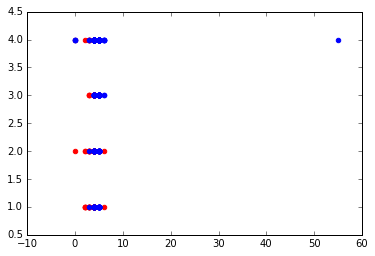

In [52]:
scatter(X_uci, y_uci, 0, 2)

In [34]:
X_uci.shape

(961, 5)

In [35]:
with_nans = np.isnan(X_uci).any(axis=1)
index = np.logical_not(with_nans)
X_uci, y_uci = X_uci[index], y_uci[index]

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_uci[:600], y_uci[:600])
y_pred = clf.predict(X_uci[600:])
sklearn.metrics.accuracy_score(y_uci[600:], y_pred)

0.83913043478260874

In [38]:
clf.coef_

array([[ 0.90427204,  0.03042879,  0.32993194,  0.42821516, -0.91187044]])

В данных есть категориальные признаки - делаем one-hot кодирование

In [40]:
data_oh = pd.get_dummies(data, columns=[2, 3])
X_oh, y_oh = data_oh[data_oh.columns.drop(5)].values, data_oh[5].values
#with_nans = np.isnan(X_oh).any(axis=1)
#index = np.logical_not(with_nans)
X_oh, y_oh = X_oh[index], y_oh[index]

In [41]:
clf = sklearn.linear_model.LogisticRegression(C=0.1)
clf.fit(X_oh[:600], y_oh[:600])
y_pred = clf.predict(X_oh[600:])
sklearn.metrics.accuracy_score(y_oh[600:], y_pred)

0.82173913043478264

На тест-сете хуже. А на кросс-валидации? Так честнее.

In [42]:
import sklearn.cross_validation

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
sc = sklearn.cross_validation.cross_val_score(sklearn.linear_model.LogisticRegression(), X_uci, y_uci, )
print(sc, sc.mean())

[ 0.78417266  0.83333333  0.81521739] 0.810907795503


In [44]:
sc = sklearn.cross_validation.cross_val_score(sklearn.linear_model.LogisticRegression(), X_oh, y_oh, )
print(sc, sc.mean())

[ 0.81654676  0.83333333  0.8115942 ] 0.820491432941


А на кросс-валидации лучше

Подбор С кросс-валидацией

In [45]:
import sklearn.grid_search

/usr/local/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [48]:
cv = sklearn.grid_search.GridSearchCV(sklearn.linear_model.LogisticRegression(), 
                                      {"C": 10.0**np.arange(-3, 7)}, verbose=10)
cv.fit(X_oh, y_oh)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.661871 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.695652 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.670290 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.776978 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.807971 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.815217 -   0.0s
[CV] C=0.1 ...........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04,
         1.00000e+05,   1.00000e+06])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [49]:
cv.grid_scores_

[mean: 0.67590, std: 0.01436, params: {'C': 0.001},
 mean: 0.80000, std: 0.01658, params: {'C': 0.01},
 mean: 0.81084, std: 0.01096, params: {'C': 0.10000000000000001},
 mean: 0.82048, std: 0.00930, params: {'C': 1.0},
 mean: 0.81687, std: 0.01215, params: {'C': 10.0},
 mean: 0.82169, std: 0.01046, params: {'C': 100.0},
 mean: 0.82169, std: 0.01046, params: {'C': 1000.0},
 mean: 0.82169, std: 0.01046, params: {'C': 10000.0},
 mean: 0.82169, std: 0.01046, params: {'C': 100000.0},
 mean: 0.82048, std: 0.01206, params: {'C': 1000000.0}]